<a href="https://colab.research.google.com/github/cshubhamrao/CactusJack-SIH/blob/master/CactusJack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 -q install face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 


In [3]:
!git clone https://github.com/davisking/dlib.git

fatal: destination path 'dlib' already exists and is not an empty directory.
/content/dlib/dlib
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [5]:
%cd /content/dlib/
!python setup.py install

/content/dlib
running install
running bdist_egg
running egg_info
creating dlib.egg-info
writing dlib.egg-info/PKG-INFO
writing dependency_links to dlib.egg-info/dependency_links.txt
writing top-level names to dlib.egg-info/top_level.txt
writing manifest file 'dlib.egg-info/SOURCES.txt'
package init file 'dlib/__init__.py' not found (or not a regular file)
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'tools/python/build*'
writing manifest file 'dlib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
running build_ext
Building extension for Python 3.6.9 (default, Nov  7 2019, 10:44:02) 
Invoking CMake setup: 'cmake /content/dlib/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/content/dlib/build/lib.linux-x86_64-3.6 -DPYTHON_EXECUTABLE=/usr/bin/python3 -DCMAKE_BUILD_TYPE=Release'
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check f

In [0]:
import dlib 

In [7]:
%cd /content 

/content


In [8]:
!git clone https://github.com/ageitgey/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 814, done.
remote: Total 814 (delta 0), reused 0 (delta 0), pack-reused 814
Receiving objects: 100% (814/814), 101.42 MiB | 30.96 MiB/s, done.
Resolving deltas: 100% (470/470), done.


In [9]:
%cd face_recognition/examples/

/content/face_recognition/examples


In [10]:
!python recognize_faces_in_pictures.py

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False


In [0]:
!python identify_and_draw_boxes_on_faces.py

In [0]:
from IPython.display import Image

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 241, Left: 419, Bottom: 562, Right: 740


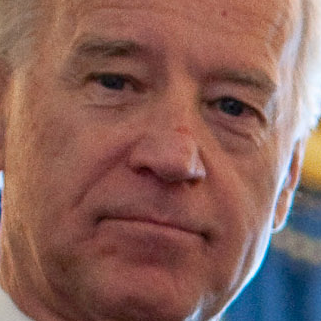

In [14]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("biden.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    display(pil_image)


In [23]:
%%timeit

import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import time
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
now = time.time()
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
now2 = time.time()
print("#1 encoding time:", now2-now)
# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("obama2.jpg")


now = time.time()
# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
now2 = time.time()
print("#2 unknown encoding time:", now2-now)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face

    now = time.time()
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    now2 = time.time()
    print("#1 match time:", now2-now)

    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    print(name)
    # Draw a box around the face using the Pillow module
    # draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # # Draw a label with a name below the face
    # text_width, text_height = draw.textsize(name)
    # draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    # draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
# display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
# pil_image.save("image_with_boxes.jpg")


#1 encoding time: 0.6970603466033936
#2 unknown encoding time: 0.5395112037658691
#1 match time: 1.811981201171875e-05
Barack Obama
#1 encoding time: 0.7312967777252197
#2 unknown encoding time: 0.4980340003967285
#1 match time: 1.8358230590820312e-05
Barack Obama
#1 encoding time: 0.6857585906982422
#2 unknown encoding time: 0.5184509754180908
#1 match time: 1.7404556274414062e-05
Barack Obama
#1 encoding time: 0.6901290416717529
#2 unknown encoding time: 0.5131251811981201
#1 match time: 1.7642974853515625e-05
Barack Obama
1 loop, best of 3: 2.71 s per loop


In [0]:
from google.colab.patches import cv2_imshow

In [25]:
import face_recognition
import cv2
import numpy as np

# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()


error: ignored

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  return binary

In [27]:
take_photo()

<IPython.core.display.Javascript object>

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x02\xd0\x05\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00=\x10\x01\x00\x02\x01\x03\x03\x03\x02\x05\x04\x01\x03\x04\x01\x02\x07\x01\x02\x11\x00\x12!1\x03AQ\x04"a\x05q\x132\x81\x91\xa1\x06B\xb1\xc1#R\xd1\xf0\x07\x14\xe1\xf13br\x15\x16$%\x82\x92C\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x05\x06\xff\xc4\x00\'\x11\x00\x02\x03\x01\x00\x02\x02\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x01\x02\x11!1\x12A\x03Q\x0